# Imgo Demo: Uptools

Hello! Welcome to **imgo**, a simple library that makes image data processing quick and easy. **Imgo** is primarily geared towards image classification but can be applied to many other types of projects.

This is a quickstart demonstration of the library's basic functionality. The demo is split into two parts:

- Processing image datasets using **imgo**'s **uptools** module
- Augmenting image data using **imgo**'s **augtools** module (see the notebook `augtools_demo.ipynb`)

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Processing Image Datasets with Uptools

**Uptools** helps to streamline various image data preprocessing tasks, such as:

 - Reading images from a local disk
 - Rescaling images
 - Normalizing and standardizing pixel values
 - Converting image datasets into numpy-arrays
 - One-hot-encoding label data
 - Splitting image datasets into training, validation, and testing subsets
 - Merging subsets into single datasets.
 - Saving data arrays as images in class subdirectories

To begin, ensure **imgo** is installed by running `pip install imgo`. From **imgo**, we can then import **uptools**:

In [2]:
# importing uptools
from imgo import uptools

The key to most of **uptools**' functionality is the `Image_Dataset` class which represents image datasets. The class comes with several attributes and methods that can be used to complete a variety of image processing tasks in a single line of code.

### Reading Image Data from Disk

Included in the same folder as this demo are a few collections of images. We will be using these for demonstration purposes. `imgs_a/` contains raw images organized into subdirectories by class, `imgs_b/` contains unorganized raw images, and `imgs_c/` contains data in the form of `X`-(images) and `y`-(labels) numpy-arrays

For the most simple case, let us create an image dataset from the images from `imgs_a`. We can do this by creating an instance of the `Image_Dataset` class and passing as an argument the path to the base directory in which the images are located and specifying the source format by setting the positional argument `mode` to `"imgs"`.

Additionally, we pass a value for the positional `img_scale` argument, which rescales the images into a square of width and height (in pixels) equal to this value. Note that this argument is non-optional because consistent image dimensions are required for most machine learning tasks.

In [3]:
my_dataset = uptools.Image_Dataset("demo_img_data/imgs_a", "imgs", 200)

Processing X_data: 100%|██████████| 15/15 [00:00<00:00, 2493.74it/s]

Compiling datasets...
Image_Datset initialized successfully.


The object we have just created is an `Image_Dataset` object composed of `X_data` (image) and `y_data` (one-hot-encoded label) arrays. We can access these two arrays by calling the `X_data` and `y_data` attributes of `my_dataset`:

```
X_data = my_dataset.X_data
y_data = my_dataset.y_data
```

We can investigate the contents of these arrays manually, or we can get some summary information using the following methods:

In [4]:
# total number of images
my_dataset.size

15

In [5]:
# number of distinct classes
my_dataset.class_no

3

In [6]:
# list of distinct classes
my_dataset.class_list

['boat', 'car', 'helicopter']

Or, we can use the `details` method to print some information:

In [7]:
# general summary info
my_dataset.details()

Image_Dataset details
---------------------
total_images: 15
-
splits: None
-
images_per_class: {'boat': 5, 'car': 5, 'helicopter': 5}
-
image_size: (200, 200)
-
pixel_values: {'min': 0, 'max': 255}
-


Or even to get a pretty visualization:

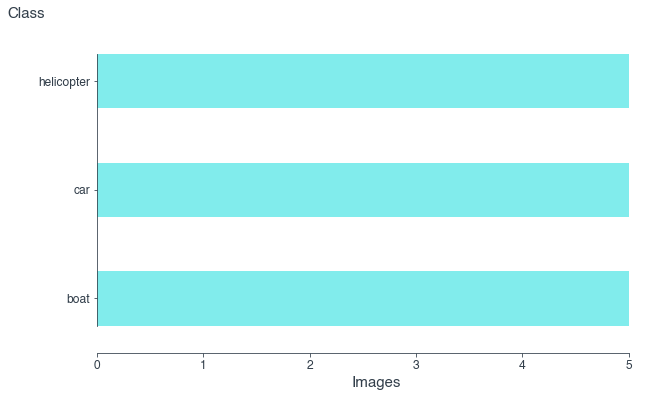

In [8]:
# pretty visualization of general summary info
my_dataset.details(plot=True)

We can also display random batches of images from `X_data` using the `display_batch` method (passing the number of rows and columns to display as arguments):

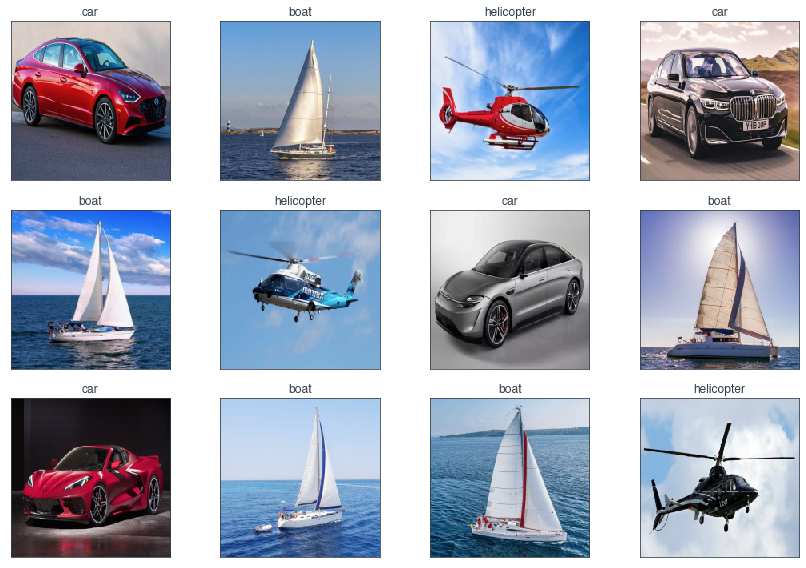

In [9]:
my_dataset.display_batch(3,4)

### Processing Images

Because the primary aim of **uptools** is to facilitate the preprocessing stage of comupter vision projects, it is likely that image data contained in an `Image_Dataset` object will need to be rescaled, normalized, and/or standardized. As we saw above, rescaling is automatic given the positional argument `img_scale`. Pixel value normalization and standardization can be performed when initializing the `Image_Dataset` object by passing `True` to the keyword argument `normalize` or `standardize` (although standardization will only occur if and when the dataset is split into subsets, as we shall see below), like so:

In [10]:
my_dataset_2 = uptools.Image_Dataset("demo_img_data/imgs_a",
                                     "imgs",
                                     210,
                                     normalize=True)

Processing X_data: 100%|██████████| 15/15 [00:00<00:00, 3767.11it/s]


Compiling datasets...
Normalizing...
Image_Datset initialized successfully.


In [11]:
my_dataset_2.details()

Image_Dataset details
---------------------
total_images: 15
-
splits: None
-
images_per_class: {'boat': 5, 'car': 5, 'helicopter': 5}
-
image_size: (210, 210)
-
pixel_values: {'min': 0.0, 'max': 1.0}
-


We see that for `my_dataset_2` the image size is now 210x210 pixels and the pixel values range from 0 to 1 (compare this to `my_dataset_1` above).

It is also likely that we will need to split the dataset into training, validation, and/or testing subsets. We can do this simply by calling the `data_split` method on the `Image_Dataset` object, and passing as an argument a tuple containing the size ratios for each subset. If the tuple contains 2 elements, `data_split` will split the dataset into training and testing subsets. If the tuple contains 3 elements, the method will split the dataset into training, validation, and testing sets.

In [12]:
my_dataset_2.data_split((0.6,0.2,0.2),stratify=True)

Splitting...
Normalizing...
Data sucessfully split into training, validation, and testing subsets.


The `data_split` method creates and sets an attribute for each of the subsets, so `X_train` can be accessed by calling `my_dataset_2.X_train`, and so on, while also setting the `X_data` and `y_data` attributes to `None`. The methods also have in-built random seed setting and subset stratification to preserve class distributions. These can be implemented by passing the `seed` and `stratify` keyword arguments, respectively. Additionally, the data in `X_val` and `X_test` can be standardized to the mean and standard deviation of the `X_train` subset using the keyword argument `standardize` when initializing the `Image_Dataset` object. In this case the data will be standardized when the dataset is split.

In [13]:
my_dataset_2.details()

Image_Dataset details
---------------------
total_images: 15
-
splits: ['train', 'val', 'test']
-
images_per_class: {'train': {'boat': 3, 'car': 3, 'helicopter': 3}, 'val': {'boat': 1, 'car': 1, 'helicopter': 1}, 'test': {'boat': 1, 'car': 1, 'helicopter': 1}}
-
image_size: (210, 210)
-
pixel_values: {'min': 0.0, 'max': 1.0}
-


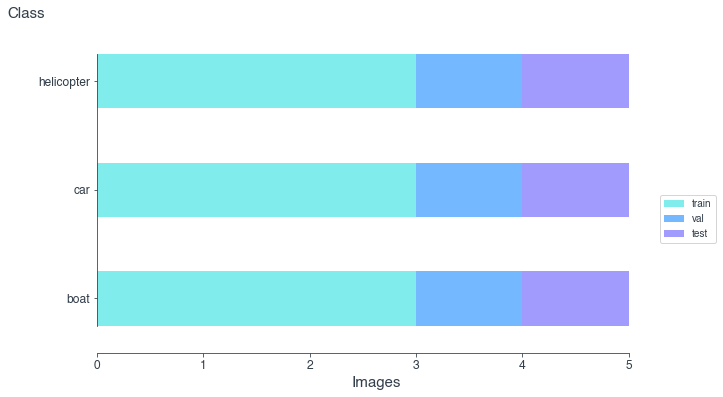

In [14]:
my_dataset_2.details(plot=True)

A split dataset can also be merged (or re-merged) using the `data_merge` method (see **Loading Pre-Split Datasets** below).

### Saving and Loading Image Datasets

Once the `Image_Dataset` object has been initialized, it can be saved to disk for later use. There are two possibilities for saving: either in array form, or as `.jpg` images in a main directory (with subdirectories for each class).

**Saving as data arrays:**

To save the data in array form, we can use the method `save_arrays`, with the name of the save directory given by the `save_dir` argument. The method will save the arrays in the path `imgo_output/uptools/save_arrays/save_dir`, creating the path and target directories if they do not already exist. This method will save the arrays in `.h5` format.

In [15]:
my_dataset_2.save_arrays("my_dataset_2_arrays")

Saving non-normalized arrays.
imgo_output/uptools/save_arrays/my_dataset_2_arrays/X_train.h5 saved successfully.
imgo_output/uptools/save_arrays/my_dataset_2_arrays/y_train.h5 saved successfully.
imgo_output/uptools/save_arrays/my_dataset_2_arrays/X_val.h5 saved successfully.
imgo_output/uptools/save_arrays/my_dataset_2_arrays/y_val.h5 saved successfully.
imgo_output/uptools/save_arrays/my_dataset_2_arrays/X_test.h5 saved successfully.
imgo_output/uptools/save_arrays/my_dataset_2_arrays/y_test.h5 saved successfully.


**Saving as images in folders organized by class:**

To save the data in image form, we can use the `save_imgs` method. Like the `save_arrays` method, this method will create a directory given by the `save_dir` argument within `imgo_output/uptools/save_imgs` (unless it already exists). Within this subdirectory, a subdirectory will be created for each class and the images belonging to that class will be saved therein.

In [16]:
my_dataset_2.save_imgs("my_dataset_2_images")

Saving: 100%|██████████| 3/3 [00:00<00:00, 123.33it/s]


**Note:** the data saved using either method will **not** be normalized or standardized, even if the `Image_Dataset` object was initialized with the `normalize` or `standardize` arguments given as `True`. This is because the normalized/standardized data is in float form rather than integer form, which takes much longer to process and results in a much larger file size. The data will therefore need to be normalized/standardized again when loaded (see below).

**Loading Image Datasets**

Datasets stored on the local disk can be loaded simply by initializing a new `Image_Dataset` object, and pass in the `mode` argument accordingly: `"imgs"` for images (as above), `"np"` for numpy files (supports both `.npy` and `.npz` formats), and `"h5"` for `.h5` files.

**Caution!** Datasets must be organized in a particular way in order to be loaded in `"np"` and `"h5"` modes:

- The `X` and `y` data files must all be located in the same folder.
- The file extensions must all be the same and be one of `.npy`, `.npz`, or `.h5`.
- The data files must be named precisely: `X_train`,`y_train`,`X_val`,`y_val`,`X_test`,`y_test` (where applicable) for split datasets; and `X_data`,`y_data` for full (unsplit or merged) datasets.

Failing to meet one or more of these organization criteria will result in errors.

As explained above, datasets will never be saved in thei normalized or standardized form if saved using **uptools** methods. It may be the case, however, that a dataset obtained elsewhere will have been normalized or standardized. If this is the case, an additional argument must be passed when initializing the `Image_Dataset` object: `pre_norm=True` and `pre_std=True`, respecitvely. Not doing so may result in errors further down the line. For the purposes of illustration, the data in `imgs_c` was saved in normalized form:

In [17]:
my_dataset_3 = uptools.Image_Dataset("demo_img_data/imgs_c",
                                     "np",
                                     150,
                                     normalize=True,                                 
                                     pre_norm=True)

Processing X_data: 100%|██████████| 24/24 [00:00<00:00, 548.26it/s]


Compiling datasets...
Normalizing...
Image_Datset initialized successfully.


In [18]:
my_dataset_3.details()

Image_Dataset details
---------------------
total_images: 24
-
splits: None
-
images_per_class: {'class_1': 6, 'class_2': 6, 'class_3': 6, 'class_4': 6}
-
image_size: (150, 150)
-
pixel_values: {'min': 0.0, 'max': 1.0}
-


Notice the class names in this case. Because there is no information in the array data about class names, **uptools** simply assigns class names as "class_1", "class_2", and so on. If we want to, we can map class names from a list of our choosing onto the images in the dataset either by passing a list of class names to the `manual_classes` argument when initializing the `Image_Dataset` object, or by using the `map_classes` method after initialization:

In [19]:
my_dataset_3.map_classes(["horse","duck","panda","squirrel"])

Note that in either case, the list is sorted alphabetically prior to mapping, therefore assuming that the `y` data is one-hot-encoded in alphabetical order (such that column 0 is the first element of the alphabetically sorted list of classes, and so on).

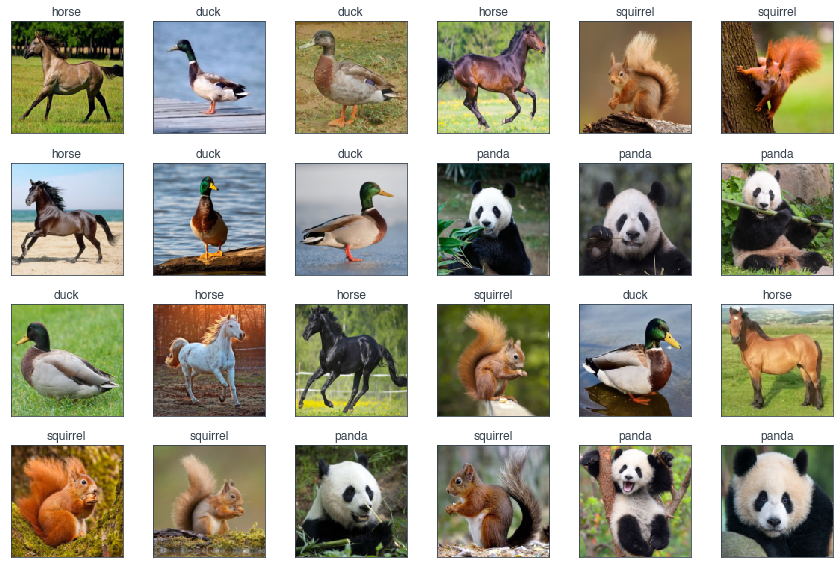

In [20]:
my_dataset_3.display_batch(4,6)

The new dataset can then be saved to disk in either numpy or image form, using `save_arrays` or `save_imgs`, respectively.

**Loading Pre-Split Datasets**

We can load datasets that have already been split into training and testing (and validation) subsets in the same way we would any other dataset. Taking for example `my_dataset_2`, which we split and saved using the `save_arrays` method:

In [21]:
my_dataset_4 = uptools.Image_Dataset("imgo_output/uptools/save_arrays/my_dataset_2_arrays","h5",180)

Processing X_test: 100%|██████████| 3/3 [00:00<00:00, 421.81it/s]

Compiling train data...
Compiling val data...
Compiling test data...
Image_Datset initialized successfully.


Here the `Image_Dataset` object is initialized with the data arrays as subset attributes, and the `X_data` and `y_data` attributes are set to `None`.

**Merging Pre-Split Datasets**

Datasets that are split into subsets for training, testing, etc, can be merged (or re-merged) using the `data_merge` method. This will combined the `X` subsets and the `y` subsets into a single pair: `X_data` and `y_data`, and reset the `Image_Dataset` object's attributes accordingly:

In [22]:
my_dataset_4.data_merge()

Merging...
Data sucessfully merged into single data set.


In [23]:
my_dataset_4.details()

Image_Dataset details
---------------------
total_images: 15
-
splits: None
-
images_per_class: {'class_1': 5, 'class_2': 5, 'class_3': 5}
-
image_size: (180, 180)
-
pixel_values: {'min': 0, 'max': 255}
-


**Note:** datasets are automatically shuffled when split into training, testing, and validation sets. Therefore, in order to shuffle a non-split dataset we can simply split it and re-merge it.

### Converting Unlabelled Images to Class Subdirectories (With List of Labels)

There might be a case in which we have a collection of images that are not labelled, but for which we have a list of labels prepared (for example an Excel spreadsheet, or simply a list of labels that correspond with the images). Using **uptools**, we can turn this collection into an `Image_Dataset` object, tied in with the list of labels, and save them to disk in either numpy form or as images in class subdirectories. To do this, we will make use of some of **uptools**' module-wide functions.

First, we can generate a Pandas DataFrame from the directory in which the images are stored using the `img_to_df` function:

In [24]:
df = uptools.img_to_df("demo_img_data/imgs_b")

We can then use `display_img_df` to have display the images in order. The images will be displayed in batches, with the first argument specifying which batch to display, the second specifying the number of batches to display, and the last two being the number of rows and columns of images to display in the batch, respectively. 

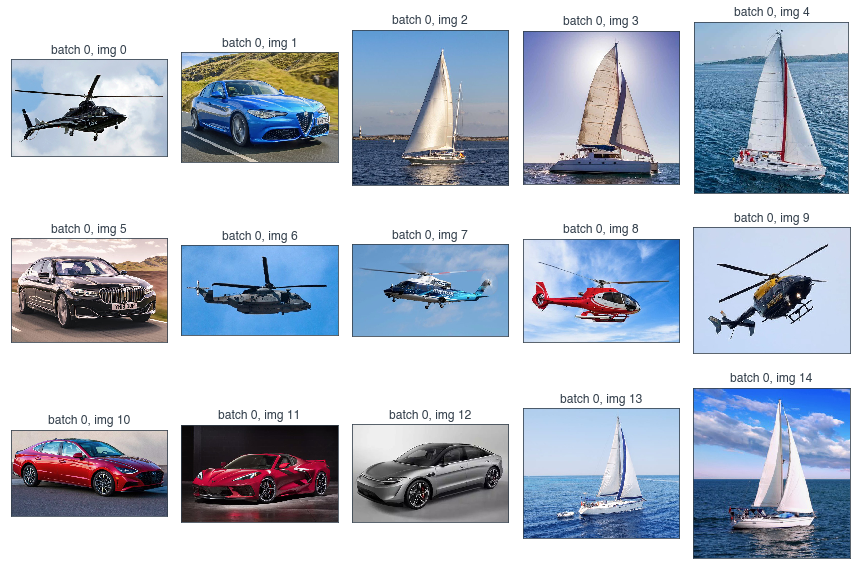

In [25]:
uptools.display_img_df(df,0,15,3,5)

We can then use the `read_img_df` function to read and process the images in the DataFrame, passing a value for the postional `img_scale` argument (which is optional in this case, but the resulting arrays can only be saved if they are rescaled using this argument). We can also save these images to disk by passing `save=True` as an argument. This will create a new folder (if it does not already exist) located at `imgo_output/uptools/preprocessing` in which the image data array will be saved (in `.h5` form).

In [26]:
unlabelled_x_array = uptools.read_img_df(df,200,save=True)

imgo_output/uptools/preprocessing/X_data.h5 saved successfully.


Now suppose we have obtained a list of labels corresponding to each image, like so:

In [27]:
labels_for_ids_5 = ["heli",
                    "car",
                    "boat",
                    "boat",
                    "boat",
                    "car",
                    "heli",
                    "heli",
                    "heli",
                    "heli",
                    "car",
                    "car",
                    "car",
                    "boat",
                    "boat"]

And so we can obtain a list of unique classes:

In [28]:
classes_for_newly_labelled_dataset = list(set(labels_for_ids_5))
classes_for_newly_labelled_dataset

['heli', 'boat', 'car']

We can then use the `one_hot_encode` function to one-hot encode the list of labels:

In [29]:
ohe_y_data = uptools.one_hot_encode(labels_for_ids_5,classes_for_newly_labelled_dataset,save=True)

imgo_output/uptools/preprocessing/y_data.h5 saved successfully.


Again, we can save the resulting one-hot encoded array as the `y_data` by passing the `save=True` argument. This will also save in the `preprocessing`. 

We now have our `X_data` and our `y_data` saved to disk in array form, and so we can create a new `Image_Dataset` object using the numpy-related arguments:

In [30]:
newly_labelled_dataset = uptools.Image_Dataset("imgo_output/uptools/preprocessing",
                                               "h5",
                                               200,
                                               manual_classes=classes_for_newly_labelled_dataset)

Processing X_data: 100%|██████████| 15/15 [00:00<00:00, 1006.33it/s]

Compiling datasets...
Image_Datset initialized successfully.


In [31]:
newly_labelled_dataset.details()

Image_Dataset details
---------------------
total_images: 15
-
splits: None
-
images_per_class: {'boat': 5, 'car': 5, 'heli': 5}
-
image_size: (200, 200)
-
pixel_values: {'min': 0, 'max': 255}
-


Now we can just save our `newly_labelled_dataset` to disk in image form!

In [32]:
newly_labelled_dataset.save_imgs('newly_labelled_dataset')

Saving: 100%|██████████| 15/15 [00:00<00:00, 230.41it/s]


And there we have it!

### Additional Utilities

Furthermore to the processes outlined above, the **uptools** module contains the following stand-alone functions that can be used to streamline data processing for image classification tasks:

- `get_class_names`: Fetches class names from subdirectories in the directory given as the base path.
- `img_to_df`: Fetches images and class names from subdirectories in the directory given as the base path and returns a DataFrame.
- `display_img_df`: Displays images contained in an x-by-2 DataFrame (where column 0 is the image path, column 1 is the class name, and x is the number of images).
- `read_img_df`: Reads images contained in an x-by-2 DataFrame (where column 0 is the image path, column 1 is the class name, and x is the number of images).
- `one_hot_encode`: One-hot encodes list of class labels.
- `auto_rescale`: Rescales an image to a square of specified dimensions.

The `Image_Dataset` class also includes the `augment_training_set` which calls on an (initialized) `imgo.augtools` augmenter to apply image augmentation to the `Image_Dataset`'s `X_train` subset. This method will be demonstrated in the **augtools** module demo.

## Volià!

For more information on **uptools**, please see the README located in the GitHub repo. Happy machine learning!